In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
import glob

In [ ]:
path = '/gpfs/bbp.cscs.ch/project/proj53/CellDensitiesProject/Production/2024/Dataframes/Distinguishable_second_layer_prediction/'

In [ ]:
filelist = glob.glob(path + '*.csv')
filelist.remove('/gpfs/bbp.cscs.ch/project/proj53/CellDensitiesProject/Production/2024/Dataframes/Distinguishable_second_layer_prediction/Features_SLD_0000560.vsi-20x_01.csv')

In [13]:
df = pd.read_csv(filelist[0])
layers = np.unique(df.RF_prediction)

layer_distance_to_pia_min = defaultdict(list)
for file in filelist:
    df = pd.read_csv(file)
    layers = np.unique(df.RF_prediction)
    for layer in layers:
        layer_distance_filter = df[df['RF_prediction'] == layer]['Distance to annotation with Outside Pia µm'].to_numpy()
        # We compute the mean of the 5 min value
        min_value_indice = np.argsort(layer_distance_filter)[:5]
        min_value = layer_distance_filter[min_value_indice].mean()
        layer_distance_to_pia_min[layer].append(min_value)

nb_entry_per_layer = len(filelist)

distances = np.zeros((layers.size, nb_entry_per_layer), dtype=float)
for index, dis in enumerate(layer_distance_to_pia_min.values()):
    distances[index][:] = dis

mean = distances.mean(axis=1)
std = distances.std(axis=1)

ind = np.arange(layers.size)    # the x locations for the groups
width = 0.7       # the width of the bars: can also be len(x) sequence

/tmp/ipykernel_24419/3778796752.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _=plt.gca().set_yticklabels(['{:.1e}'.format(x) for x in current_values])


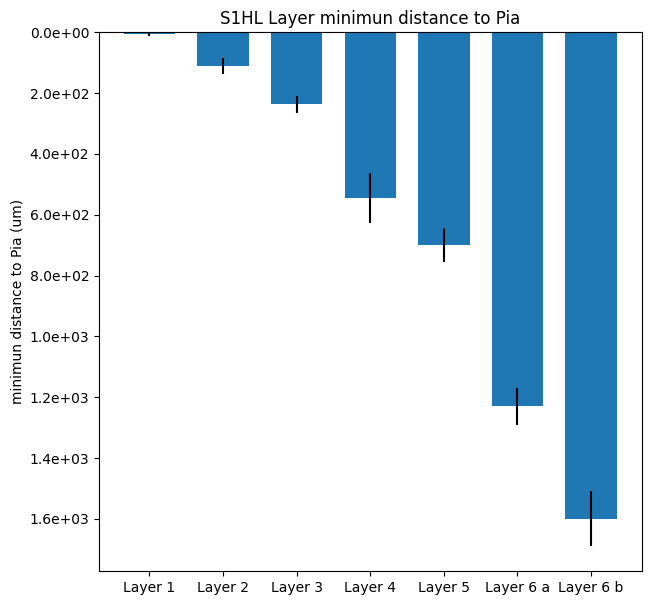

In [14]:
plt.figure(figsize=(7, 7))
p1 = plt.bar(ind, mean, width, yerr=std)
plt.gca().invert_yaxis()

plt.ylabel('minimun distance to Pia (um)')
plt.title('S1HL Layer minimun distance to Pia')
 
plt.xticks(ind, layers)   
current_values = plt.gca().get_yticks()
_=plt.gca().set_yticklabels(['{:.1e}'.format(x) for x in current_values])

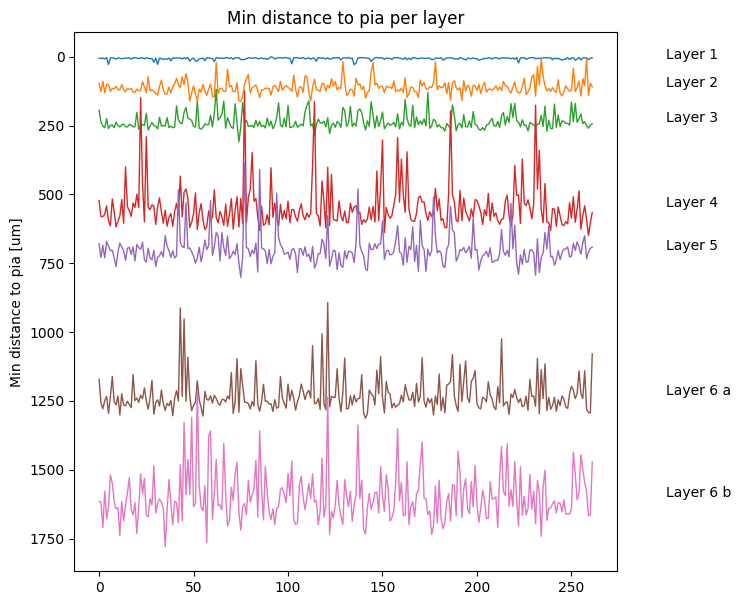

In [15]:



plt.figure(figsize=(7,7))
for layer in layers:
    distances = np.array(layer_distance_to_pia_min[layer])
    _=plt.plot (distances, linewidth=1)
    plt.text(300, distances.mean(), layer)
    plt.ylabel('Min distance to pia [um]')
    plt.title('Min distance to pia per layer')
    plt.gca().invert_yaxis()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


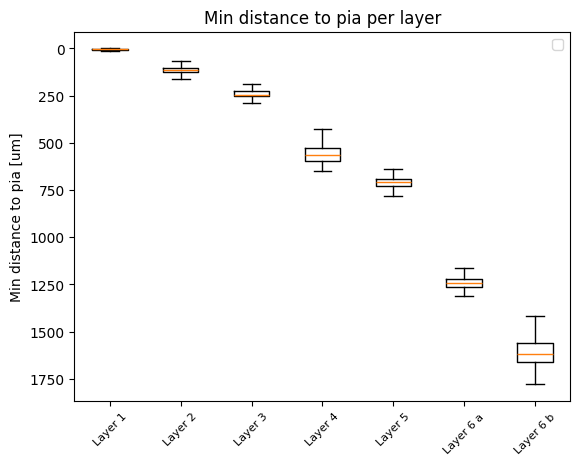

In [16]:

layers_distances = []

#plt.figure(figsize=(1,12))
for layer in layers:
    distances = np.array(layer_distance_to_pia_min[layer])
    layers_distances.append(distances)

plt.boxplot(layers_distances, 0, '')
plt.gca().set_xticklabels(layers,
                    rotation=45, fontsize=8)
plt.ylabel('Min distance to pia [um]')
plt.title('Min distance to pia per layer')
plt.legend()
plt.gca().invert_yaxis()


In [1]:
# TEst alpha shape library

In [2]:
from qupath_processing.geometry import alpha_shape
from shapely.geometry import Point


In [3]:
df = pd.read_csv('/gpfs/bbp.cscs.ch/project/proj53/LayerBoundariesProject/Production/20231102/datasets/Exported_Features/Dataframes/For_prediction/01122024/Distinguishable_second_layer_prediction/Features_SLD_0000401.vsi-20x_04.csv', index_col=0)

In [4]:
df = df[df.RF_prediction == 'Layer 5']

In [5]:
cells_pos = df[['Centroid X µm', 'Centroid Y µm']].to_numpy()

In [6]:
points_p = [Point([point[0], point[1]]) for point in cells_pos]

In [7]:
local_concave_hull, _ = alpha_shape(points_p, 0.05)

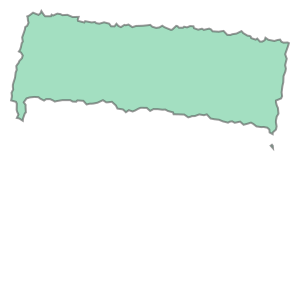

In [8]:
local_concave_hull

In [12]:
import alphashape

In [13]:
alpha_shape = alphashape.alphashape(cells_pos, 0.05)

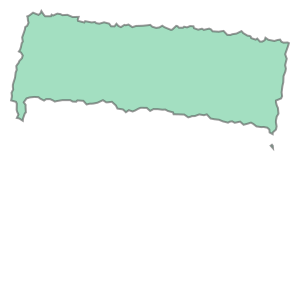

In [14]:
alpha_shape

In [15]:
local_concave_hull.area

762438.01

In [16]:
alpha_shape.area

762438.01

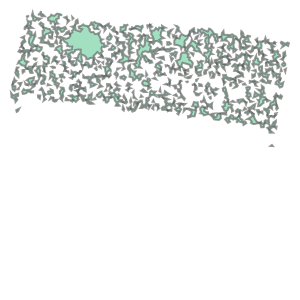

In [21]:
alpha_shape = alphashape.alphashape(cells_pos, 0.1)
alpha_shape

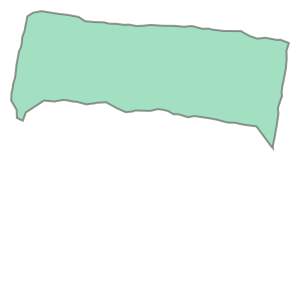

In [24]:
alpha_shape = alphashape.alphashape(cells_pos, 0.01)
alpha_shape

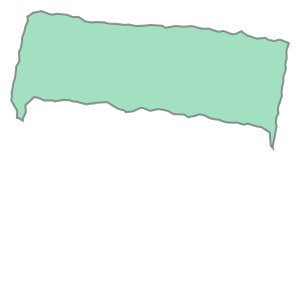

In [25]:
alpha_shape = alphashape.alphashape(cells_pos, 0.02)
alpha_shape

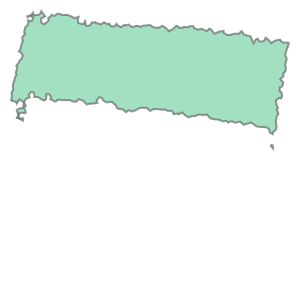

In [26]:
alpha_shape = alphashape.alphashape(cells_pos, 0.06)
alpha_shape